In [6]:
import pandas as pd  
import matplotlib.pyplot as plt


# Step 1: Get the data
## Read the data (CSV file)
First, we will load the CSV file (available at Kaggle's [competition page](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)) and check the columns, its names type and non-null value count, through the _info()_ method



In [2]:
houses_df = pd.read_csv('train.csv')
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## That's a ton of columns!!!

Too many columns, right? 80 to be precise. Using the _columns_ attribute, we can take a better look to the names of every column in the ***houses_df*** dataframe



In [9]:
houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Reduce columns

The objective of this exercise is to create a simple ML model rather than creating a top performing model*. So we'll trim down the dataset by removing most of the columns and we'll just keep:

* LotArea: Lot size (in square feet)
* OverallCond: Overall condition rating (1-9)
* YearBuilt: Original construction date
* BedroomAbvGr: Number of bedrooms above basement level
* FullBath: Full bathrooms above
* GarageCars: Size of garage in car capacity (0-4)
* SalePrice: Property's sale price in US dollars

_*Actually, sometimes, more features (columns) just add more complexity and we get a low performance model_

In [10]:
data_cols = ['LotArea','OverallCond','YearBuilt','BedroomAbvGr','FullBath','GarageCars','SalePrice']

# Reduce number of columns 
data = houses_df[data_cols]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallCond   1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   GarageCars    1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


## Better looks
Now this dataset is much prettier for us to begin with :)

...But I still don't like it :(

Let's make the columns a bit more readable!!!

In [12]:
new_colnames=['LotArea','OverallCond','YearBuilt','Bedrooms','Bathrooms','GarageCars','SalePrice']
data.columns=new_colnames

In [15]:
data.head()

,LotArea,OverallCond,YearBuilt,Bedrooms,Bathrooms,GarageCars,SalePrice
0,8450,5,2003,3,2,2,208500
1,9600,8,1976,3,2,2,181500
2,11250,5,2001,3,2,2,223500
3,9550,5,1915,3,1,3,140000
4,14260,5,2000,4,2,3,250000


## Better looks (part II)
Now this is a dataset!!! (for me :) )

## Unit conversion (ft^2 to m^2)
This conversion is done for convenience, and does not affect the model performance, just more readable (for us, non-empire readers ;) )

In [16]:
# function to convert a value from ft^2 to m^2
def sqf_to_sqm(ft):
    ft_in_meter=0.3048
    sqft=ft_in_meter**2
    return round(ft*sqft,2)

In [17]:
sqf_to_sqm(1000) #test

92.9

In [18]:
data = data.copy()
data['AreaMt2'] = data.apply(lambda x: sqf_to_sqm(x['LotArea']),axis=1) #Convert from sqf to sqm
data.drop('LotArea',axis = 1,inplace = True) #Drop the Old column (LotArea)

In [19]:
data.head()

,OverallCond,YearBuilt,Bedrooms,Bathrooms,GarageCars,SalePrice,AreaMt2
0,5,2003,3,2,2,208500,785.03
1,8,1976,3,2,2,181500,891.87
2,5,2001,3,2,2,223500,1045.16
3,5,1915,3,1,3,140000,887.22
4,5,2000,4,2,3,250000,1324.80


## Check the split datasets

Now we'll be able to have 2 different object holding the dependent variables (train) and the target variable (target)

In [20]:
features = data.drop('SalePrice',axis=1) #Store everything but the target value
target = data['SalePrice'] #Store target value
features.head()

,OverallCond,YearBuilt,Bedrooms,Bathrooms,GarageCars,AreaMt2
0,5,2003,3,2,2,785.03
1,8,1976,3,2,2,891.87
2,5,2001,3,2,2,1045.16
3,5,1915,3,1,3,887.22
4,5,2000,4,2,3,1324.80


In [21]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# Step 2: Exploratory Data Analysis

## Data visualization

We'll learn more about this in later chapters. For now, it's just illustrative.

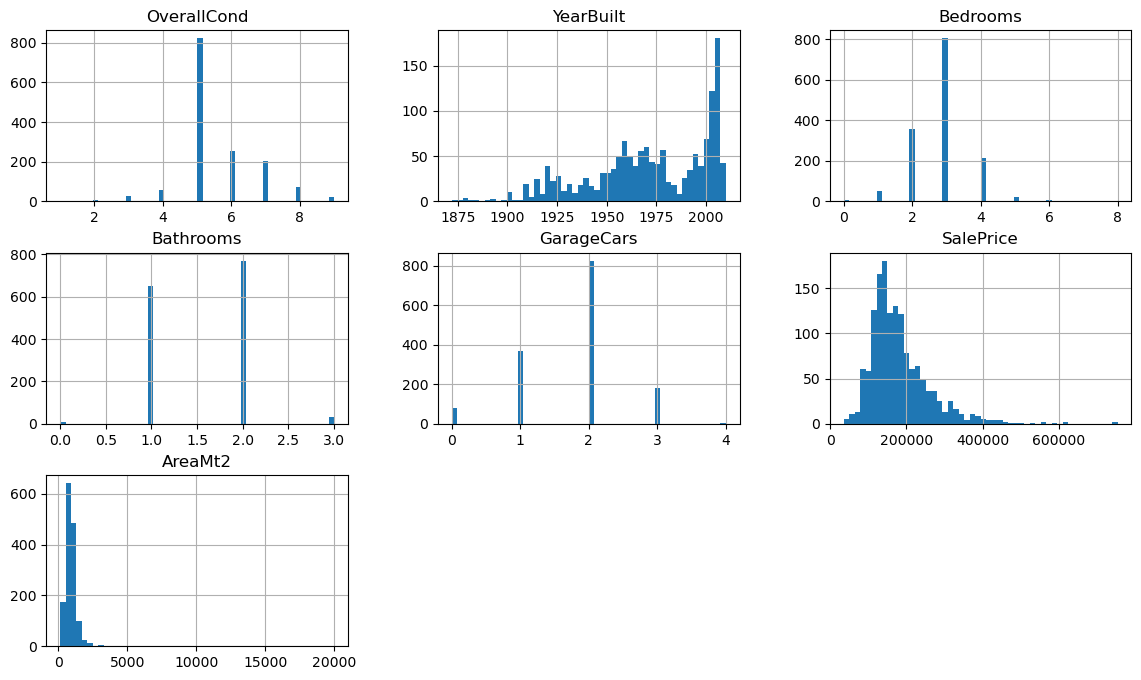

In [22]:
data.hist(bins=50, figsize=(14,8))
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=24)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

# Step 3: ~~Feature engineering~~ (Skipped for now)

# Step 4: Train model

## Split dataset into train/test
In order to evaluate later our model's performance we need to set apart some data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [25]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.25,random_state=123)


In [37]:
X_test.head()

,OverallCond,YearBuilt,Bedrooms,Bathrooms,GarageCars,AreaMt2
147,5,2001,3,2,2,883.04
676,2,1900,4,2,3,891.87
1304,5,2004,3,2,2,312.43
1372,6,1998,3,2,2,905.80
1427,6,1945,3,1,1,1015.43


In [38]:
y_test[:5]

147     222500
676      87000
1304    130000
1372    274300
1427    140000
Name: SalePrice, dtype: int64

In [36]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Step 5: Evaluate ~~and tune model~~


In [39]:
print("Predicted values: ",[round(x) for x in reg.predict(X_test.head())])
print("Real values: ",list(y_test.head()))

Predicted values:  [220146, 169584, 213933, 227485, 117430]
Real values:  [222500, 87000, 130000, 274300, 140000]
